In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Spotify

In [2]:
# Read the spotify dataset
spotify_df = pd.read_csv('dataset.csv')
spotify_df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


## Preprocessing

In [3]:
# Drop the first columns
spotify_df.drop(columns=spotify_df.columns[0], axis=1, inplace=True)

In [4]:
# Remove unused columns
unused_col = ['track_id', 'artists', 'album_name', 'track_name', 'mode', 'time_signature', 'instrumentalness', 'duration_ms']
spotify_df = spotify_df.drop(columns=unused_col)

In [5]:
spotify_df.head(10)

,popularity,explicit,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,track_genre
0,73,False,0.676,0.4610,1,-6.746,0.1430,0.0322,0.3580,0.7150,87.917,acoustic
1,55,False,0.420,0.1660,1,-17.235,0.0763,0.9240,0.1010,0.2670,77.489,acoustic
2,57,False,0.438,0.3590,0,-9.734,0.0557,0.2100,0.1170,0.1200,76.332,acoustic
3,71,False,0.266,0.0596,0,-18.515,0.0363,0.9050,0.1320,0.1430,181.740,acoustic
4,82,False,0.618,0.4430,2,-9.681,0.0526,0.4690,0.0829,0.1670,119.949,acoustic
5,58,False,0.688,0.4810,6,-8.807,0.1050,0.2890,0.1890,0.6660,98.017,acoustic
6,74,False,0.407,0.1470,2,-8.822,0.0355,0.8570,0.0913,0.0765,141.284,acoustic
7,80,False,0.703,0.4440,11,-9.331,0.0417,0.5590,0.0973,0.7120,150.960,acoustic
8,74,False,0.625,0.4140,0,-8.700,0.0369,0.2940,0.1510,0.6690,130.088,acoustic
9,56,False,0.442,0.6320,1,-6.770,0.0295,0.4260,0.0735,0.1960,78.899,acoustic


In [6]:
# Check if dataset contain any null value
spotify_df.isnull().values.any()

False

In [7]:
# Inspect dataset structure
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   popularity    114000 non-null  int64  
 1   explicit      114000 non-null  bool   
 2   danceability  114000 non-null  float64
 3   energy        114000 non-null  float64
 4   key           114000 non-null  int64  
 5   loudness      114000 non-null  float64
 6   speechiness   114000 non-null  float64
 7   acousticness  114000 non-null  float64
 8   liveness      114000 non-null  float64
 9   valence       114000 non-null  float64
 10  tempo         114000 non-null  float64
 11  track_genre   114000 non-null  object 
dtypes: bool(1), float64(8), int64(2), object(1)
memory usage: 9.7+ MB


In [8]:
# Get 1 entries from each track_genre column
spotify_df = spotify_df.groupby('track_genre').head(5)

In [9]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 113004
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    570 non-null    int64  
 1   explicit      570 non-null    bool   
 2   danceability  570 non-null    float64
 3   energy        570 non-null    float64
 4   key           570 non-null    int64  
 5   loudness      570 non-null    float64
 6   speechiness   570 non-null    float64
 7   acousticness  570 non-null    float64
 8   liveness      570 non-null    float64
 9   valence       570 non-null    float64
 10  tempo         570 non-null    float64
 11  track_genre   570 non-null    object 
dtypes: bool(1), float64(8), int64(2), object(1)
memory usage: 54.0+ KB


In [10]:
# Check columns number of unique values
spotify_df.nunique()

popularity       88
explicit          2
danceability    327
energy          368
key              12
loudness        475
speechiness     348
acousticness    423
liveness        319
valence         378
tempo           476
track_genre     114
dtype: int64

In [11]:
# Get all track_genre columns unique values
spotify_df['track_genre'].unique().tolist()

['acoustic',
 'afrobeat',
 'alt-rock',
 'alternative',
 'ambient',
 'anime',
 'black-metal',
 'bluegrass',
 'blues',
 'brazil',
 'breakbeat',
 'british',
 'cantopop',
 'chicago-house',
 'children',
 'chill',
 'classical',
 'club',
 'comedy',
 'country',
 'dance',
 'dancehall',
 'death-metal',
 'deep-house',
 'detroit-techno',
 'disco',
 'disney',
 'drum-and-bass',
 'dub',
 'dubstep',
 'edm',
 'electro',
 'electronic',
 'emo',
 'folk',
 'forro',
 'french',
 'funk',
 'garage',
 'german',
 'gospel',
 'goth',
 'grindcore',
 'groove',
 'grunge',
 'guitar',
 'happy',
 'hard-rock',
 'hardcore',
 'hardstyle',
 'heavy-metal',
 'hip-hop',
 'honky-tonk',
 'house',
 'idm',
 'indian',
 'indie-pop',
 'indie',
 'industrial',
 'iranian',
 'j-dance',
 'j-idol',
 'j-pop',
 'j-rock',
 'jazz',
 'k-pop',
 'kids',
 'latin',
 'latino',
 'malay',
 'mandopop',
 'metal',
 'metalcore',
 'minimal-techno',
 'mpb',
 'new-age',
 'opera',
 'pagode',
 'party',
 'piano',
 'pop-film',
 'pop',
 'power-pop',
 'progressive

In [12]:
# Get only certain track genres 
filter_genre = ['acoustic', 'indie', 'spanish', 'sad', 'hip-hop']
spotify_df = spotify_df[spotify_df['track_genre'].isin(filter_genre)]

In [13]:
spotify_df['track_genre'].unique().tolist()

['acoustic', 'hip-hop', 'indie', 'sad', 'spanish']

In [14]:
spotify_df.reset_index(drop=True, inplace=True)

In [15]:
# Change the explicit columns to intergers
# It only has two unique values: TRUE, FALSE
explicit_dict = {'FALSE': 0, 'TRUE': 1}
spotify_df['explicit'] = spotify_df['explicit'].replace(explicit_dict).astype(int)

In [16]:
spotify_df.head(10)

,popularity,explicit,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,track_genre
0,73,0,0.676,0.4610,1,-6.746,0.1430,0.03220,0.3580,0.715,87.917,acoustic
1,55,0,0.420,0.1660,1,-17.235,0.0763,0.92400,0.1010,0.267,77.489,acoustic
2,57,0,0.438,0.3590,0,-9.734,0.0557,0.21000,0.1170,0.120,76.332,acoustic
3,71,0,0.266,0.0596,0,-18.515,0.0363,0.90500,0.1320,0.143,181.740,acoustic
4,82,0,0.618,0.4430,2,-9.681,0.0526,0.46900,0.0829,0.167,119.949,acoustic
5,83,0,0.860,0.5410,1,-6.510,0.0325,0.16500,0.0663,0.952,114.984,hip-hop
6,83,0,0.768,0.4870,4,-8.936,0.0431,0.24000,0.1750,0.722,137.034,hip-hop
7,82,0,0.711,0.7020,5,-10.048,0.2330,0.00487,0.0932,0.674,180.219,hip-hop
8,77,0,0.796,0.5720,8,-7.030,0.0545,0.41600,0.0975,0.304,98.967,hip-hop
9,89,1,0.591,0.7640,1,-5.484,0.0483,0.03830,0.1030,0.478,169.928,hip-hop


In [17]:
# Check explicit unique values still remain at 2
spotify_df['explicit'].nunique()

2

## Classfication

In [18]:
# Get the data and labels 
data = spotify_df.drop(columns='track_genre')
labels = spotify_df['track_genre']

In [19]:
labels.unique()

array(['acoustic', 'hip-hop', 'indie', 'sad', 'spanish'], dtype=object)

In [20]:
print(labels.shape, data.shape)

(25,) (25, 11)


In [21]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

### Classification with KNN

In [22]:
# Model
model_knn = KNeighborsClassifier(n_neighbors=3)

In [23]:
# Fit
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
knn_predict = model_knn.predict(x_test)

In [25]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

    acoustic       0.00      0.00      0.00         1
     hip-hop       0.00      0.00      0.00         1
       indie       0.00      0.00      0.00         1
         sad       0.00      0.00      0.00         1
     spanish       1.00      1.00      1.00         1

    accuracy                           0.20         5
   macro avg       0.20      0.20      0.20         5
weighted avg       0.20      0.20      0.20         5



/Users/jeffreyabraham/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeffreyabraham/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeffreyabraham/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### DecisionTree Classfication

In [26]:
# Model
model_dt = DecisionTreeClassifier(random_state=0)

In [27]:
# Fit
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
# Predict
dt_predict = model_dt.predict(x_test)

In [29]:
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

    acoustic       0.00      0.00      0.00         1
     hip-hop       0.50      1.00      0.67         1
       indie       0.00      0.00      0.00         1
         sad       0.00      0.00      0.00         1
     spanish       1.00      1.00      1.00         1

    accuracy                           0.40         5
   macro avg       0.30      0.40      0.33         5
weighted avg       0.30      0.40      0.33         5



/Users/jeffreyabraham/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeffreyabraham/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeffreyabraham/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion Matrix

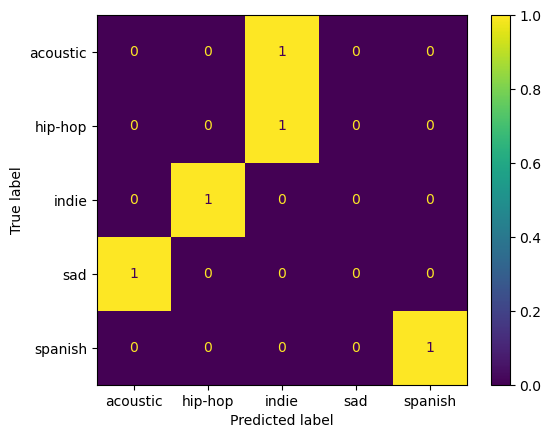

In [30]:
# KNN Confusion Matrix
cm = confusion_matrix(y_test, knn_predict, labels=model_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_knn.classes_)
disp.plot()
plt.show()

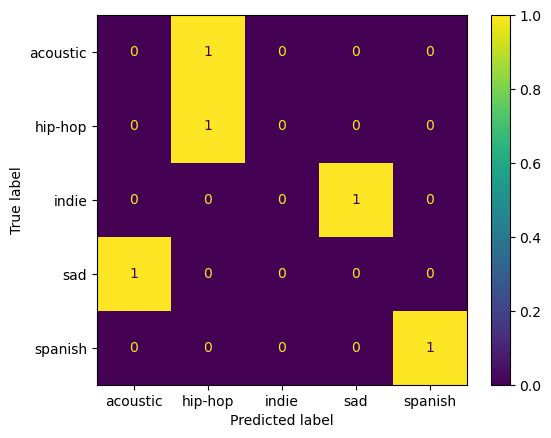

In [33]:
# DecisionTree Confusion Matrix
cm = confusion_matrix(y_test, dt_predict, labels=model_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_)
disp.plot()
plt.show()